In [1]:
import pandas as pd

# Data Cleaning and Preparation

In [2]:
data=pd.read_csv("Cardiotocographic.csv")

In [3]:
data.head() #Gives the first five rows in the dataset

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [4]:
data.columns #gives the column names in the dataset

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [5]:
data.shape

(2126, 14)

In [6]:
print(data.isnull().sum())

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [7]:
#there are very few missing data so its better to fill those instead of deleting
data.nunique()


LB           153
AC          1067
FM           776
UC          1364
DL           822
DS           114
DP           264
ASTV         183
MSTV         165
ALTV         195
MLTV         351
Width        261
Tendency     111
NSP          111
dtype: int64

In [8]:
#Handle missing values appropriately (e.g., imputation, deletion).
# Fill missing values with median
data.fillna(data.median(), inplace=True) # Filling the  missing values with median


In [9]:
# Verifying if missing values are handled
print(data.isnull().sum())  

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [10]:
#Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Tendency  2126 non-null   float64
 13  NSP       2126 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [11]:
data.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [12]:
#the above shows that the datatypes are all float therefore all the given data is numeric

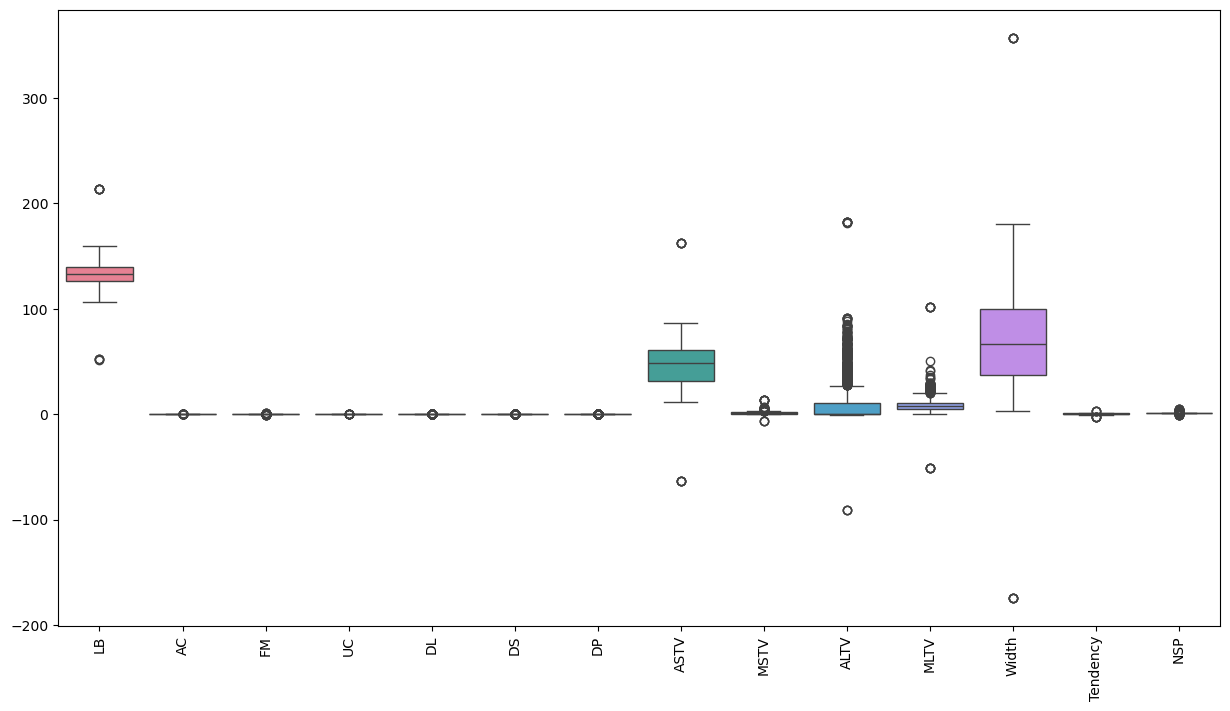

In [13]:
#Detect and treat outliers if necessary
#Box plot
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

In [14]:
#2.interquartile range

q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
outliers=((data<lower_bound)|(data>upper_bound))
print(outliers)

         LB     AC     FM     UC     DL     DS     DP   ASTV   MSTV   ALTV  \
0     False  False  False  False  False  False  False  False  False   True   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
4     False  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2121  False  False   True  False  False  False  False  False  False  False   
2122  False  False  False  False  False  False  False  False  False  False   
2123  False  False  False  False  False  False  False  False  False  False   
2124  False  False  False  False  False  False  False  False  False  False   
2125  False  False  False  False  False  False  False  False  False   True   

       MLTV  Width  Tendency    NSP  
0     False  False     Fa

In [15]:
#the above two methods show the the data contaims outliers
out_c=outliers.sum()#checking the number of outliers per column
print(out_c)

LB           10
AC           43
FM          347
UC           13
DL          125
DS          120
DP          284
ASTV         10
MSTV         80
ALTV        318
MLTV         81
Width        10
Tendency     10
NSP         559
dtype: int64


In [16]:
#as number of data is less its best to capp the outliers instead of removing them.
import numpy as np
capped_data = data.copy()
for x in data.columns:
    capped_data[x] = np.where(data[x] < lower_bound[x], lower_bound[x], 
                                np.where(data[x] > upper_bound[x], upper_bound[x], data[x]))

# Checking how many values were capped
capped_values = (data != capped_data).sum()
print("Number of capped values per column:\n", capped_values)

Number of capped values per column:
 LB           10
AC           43
FM          347
UC           13
DL          125
DS          120
DP          284
ASTV         10
MSTV         80
ALTV        318
MLTV         81
Width        10
Tendency     10
NSP         559
dtype: int64


In [17]:
capped_data


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,27.5,2.4,64.0,0.999926,1.0
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,20.1,117.0,1.000000,1.0
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.006416,0.007426,0.000000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,0.000000,1.0
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,1.000000,1.0
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,1.000000,1.0
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,1.000000,1.0


In [18]:
data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [19]:
capped_data.skew()#skewness of capped data

LB          0.018542
AC          1.066717
FM          1.129418
UC          0.148635
DL          1.231821
DS          0.000000
DP          0.000000
ASTV       -0.015788
MSTV        0.763373
ALTV        1.211892
MLTV        0.501995
Width       0.290526
Tendency   -0.263704
NSP         0.000000
dtype: float64

In [20]:
data.skew()#skewness of original data

LB          0.323245
AC          2.032396
FM          6.753070
UC          0.974239
DL          2.010390
DS          8.461304
DP          6.456342
ASTV        0.055872
MSTV        4.142518
ALTV        2.981199
MLTV        3.561739
Width       0.500036
Tendency   -0.484072
NSP         1.826906
dtype: float64

In [21]:
#The above difference in skewness between the capped data and orignial is show 

In [22]:
#updating the cleaned data to a new csv file
capped_data.to_csv("cleaned_data.csv", index=False)


In [25]:
#checking if the file is created
import os
print("File exists:", os.path.exists("cleaned_data.csv"))

File exists: True


In [26]:
data=pd.read_csv("cleaned_data.csv")

In [28]:
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,27.5,2.4,64.0,0.999926,1.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,20.1,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [30]:
data.skew()

LB          0.018542
AC          1.066717
FM          1.129418
UC          0.148635
DL          1.231821
DS          0.000000
DP          0.000000
ASTV       -0.015788
MSTV        0.763373
ALTV        1.211892
MLTV        0.501995
Width       0.290526
Tendency   -0.263704
NSP         0.000000
dtype: float64

In [31]:
#now we are the cleanened data for the further steps

# 2.	Statistical Summary:

In [32]:
data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.0,2126.0,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.0
mean,133.290331,0.003132,0.001568,0.004362,0.001770,0.0,0.0,46.981873,1.304644,6.691678,8.007471,70.287203,0.316537,1.0
std,9.930268,0.003828,0.002485,0.003001,0.002668,0.0,0.0,17.612745,0.781091,10.378400,5.047078,39.571995,0.622406,0.0
min,105.000000,-0.008409,-0.003850,-0.005177,-0.004934,0.0,0.0,-11.500000,-0.800000,-16.500000,-4.700000,-57.500000,-1.500000,1.0
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.0,0.0,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.0
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.0,0.0,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.0
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.0,0.0,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.0
max,161.000000,0.014015,0.006416,0.013564,0.008224,0.0,0.0,104.500000,3.200000,27.500000,20.100000,194.500000,2.500000,1.0


In [33]:
#findings from the above
#DS and DP Contain Only Zero Values that is they may not provide any meaningful insights to dataset

# 3.	Data Visualization:

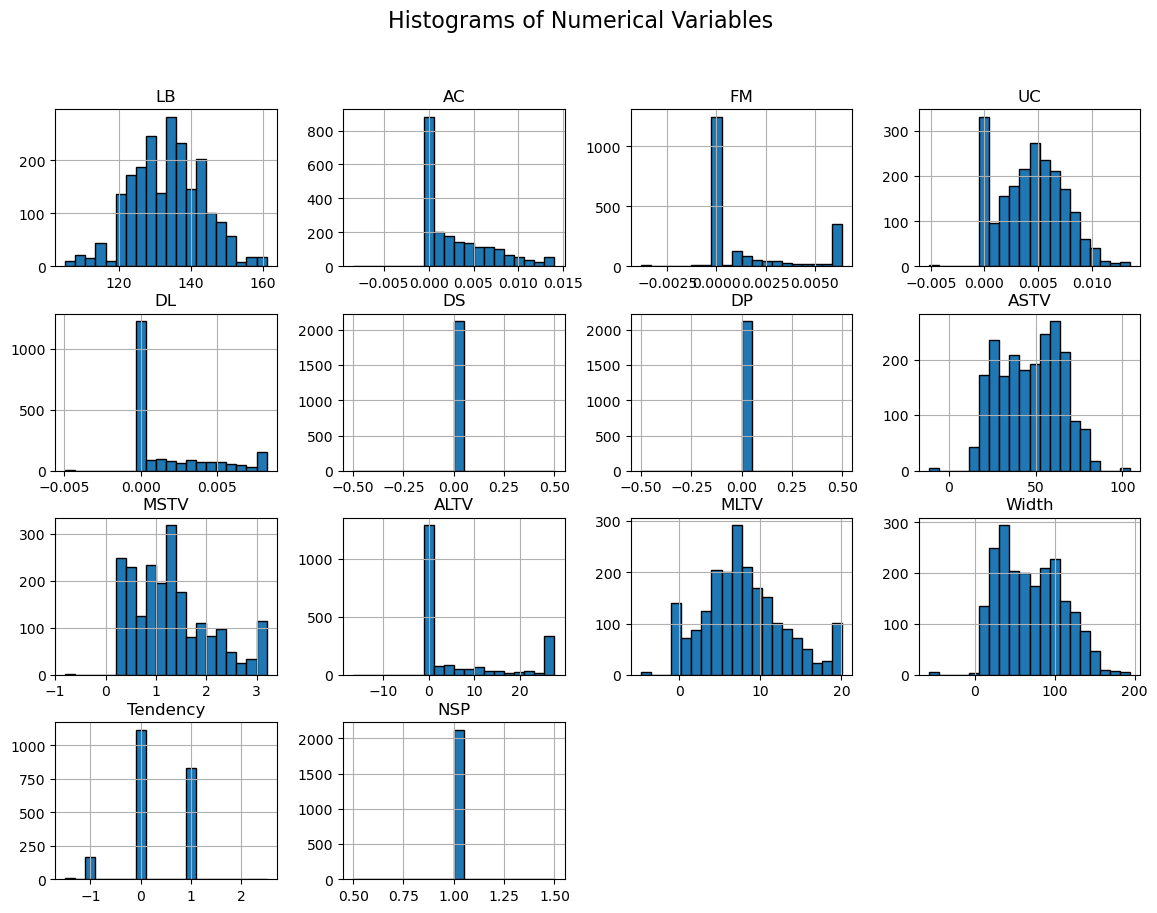

In [35]:
#Create histograms or boxplots to visualize the distributions of various numerical variables.
data.hist(figsize=(14, 10), bins=20, edgecolor="black")
plt.suptitle("Histograms of Numerical Variables", fontsize=16)
plt.show()

<AxesSubplot:>

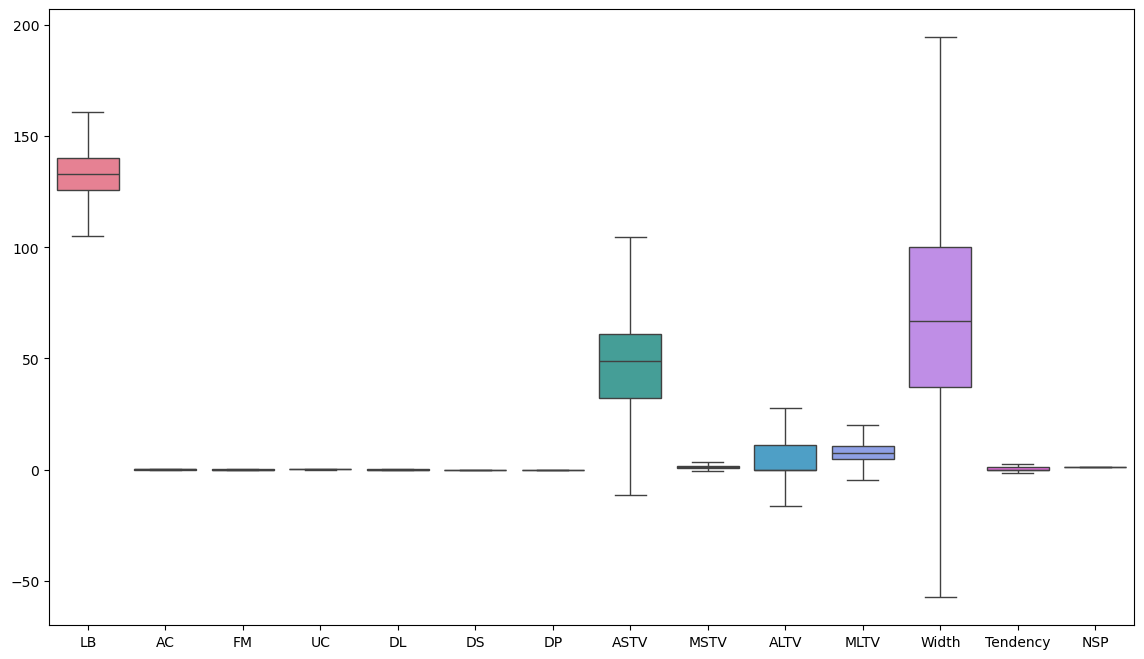

In [37]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=data)

In [38]:
#both histogram and box plot shows some variables are highly skewed

In [40]:
#Use bar charts or pie charts to display the frequency of categories for categorical variables.
#lets check if there is any categorical data in our dataset
data.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [41]:
#above shows all the columns has numerical data

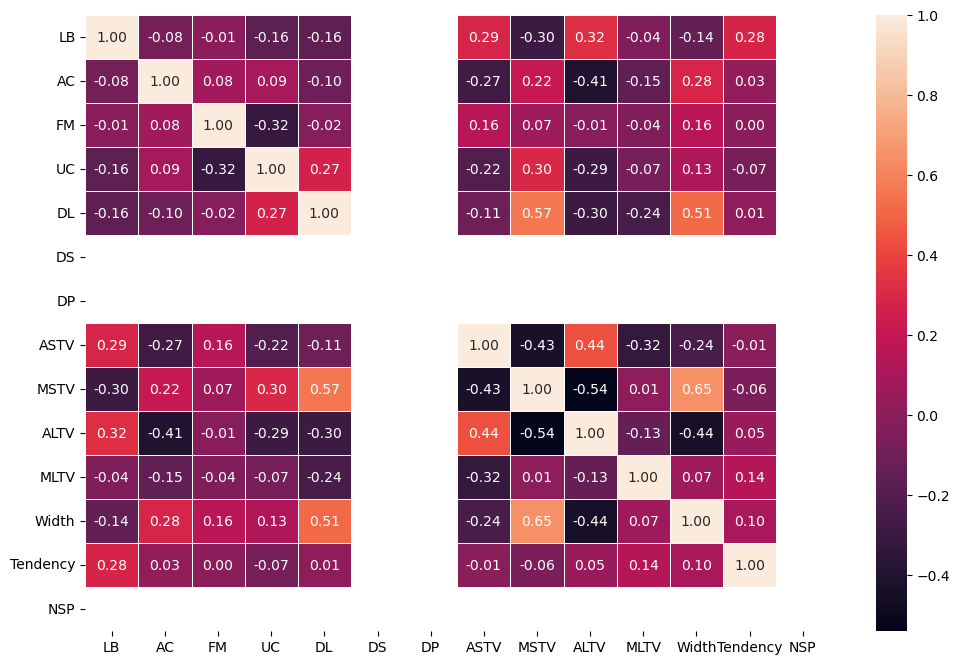

In [54]:
#Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

# Generate a correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.show()


# 4.	Pattern Recognition and Insights:

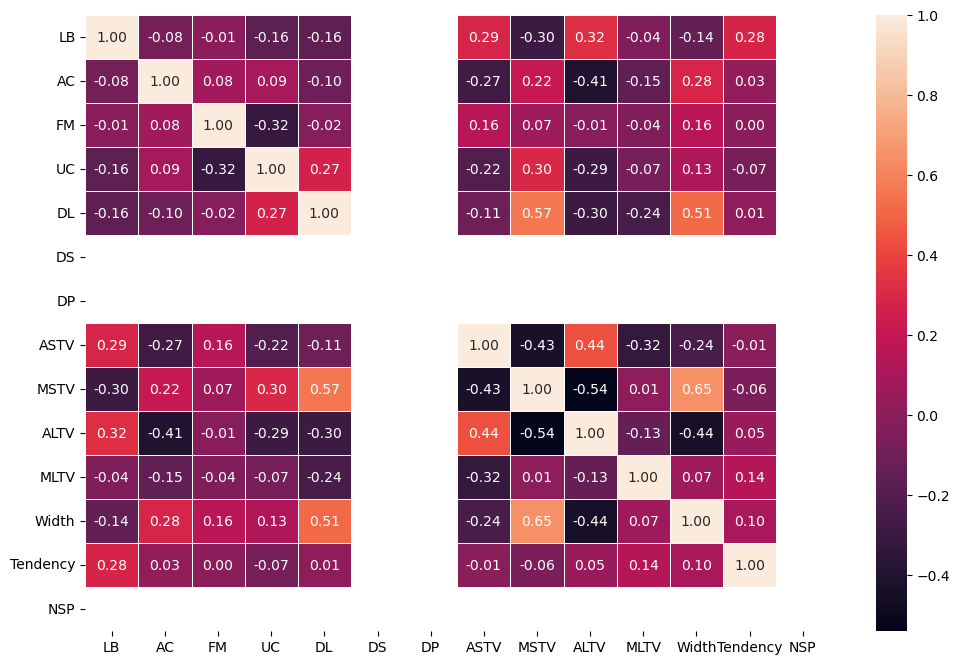


Strongest Correlations (above 0.5 or below -0.5):

Width  MSTV     0.645744
MSTV   Width    0.645744
DL     MSTV     0.566340
MSTV   DL       0.566340
Width  DL       0.514538
DL     Width    0.514538
ALTV   MSTV    -0.541156
MSTV   ALTV    -0.541156
dtype: float64


In [49]:

# Computing the correlation matrix
correlation_matrix = data.corr()

# Display the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.show()

# Identify the strongest correlations (absolute value > 0.5)
strong_correlations = correlation_matrix.unstack().sort_values(ascending=False)
strong_correlations = strong_correlations[(abs(strong_correlations) > 0.5) & (strong_correlations < 1)]
print("\nStrongest Correlations (above 0.5 or below -0.5):\n")
print(strong_correlations)


In [50]:
#Strong Positive Correlations:
#DL and Width (0.51): A strong correlation suggests that as DL increases, Width also increases. This could imply that DL contributes to overall measurement width.
#MSTV and Width (0.65): A significant positive correlation indicates that an increase in MSTV (which might be a time-based variable) corresponds to a wider measurement.

#Strong Negative Correlations:
#MSTV and ALTV (-0.54): A strong inverse relationship implies that higher MSTV values tend to be associated with lower ALTV values.
#ASTV and MSTV (-0.43): A negative correlation between these variables might indicate that when ASTV increases, MSTV tends to decrease.

#Moderate Positive Correlations:
#ASTV and ALTV (0.44): This suggests that these two variables may be related in a way that higher values of ASTV correspond with higher ALTV values.
#DL and MSTV (0.57): A moderate positive relationship suggests that increases in DL are associated with increases in MSTV.

In [51]:
df.info

<bound method DataFrame.info of               LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.006416  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV  ALTV  MLTV  Width  Tendency  NSP  
0      0

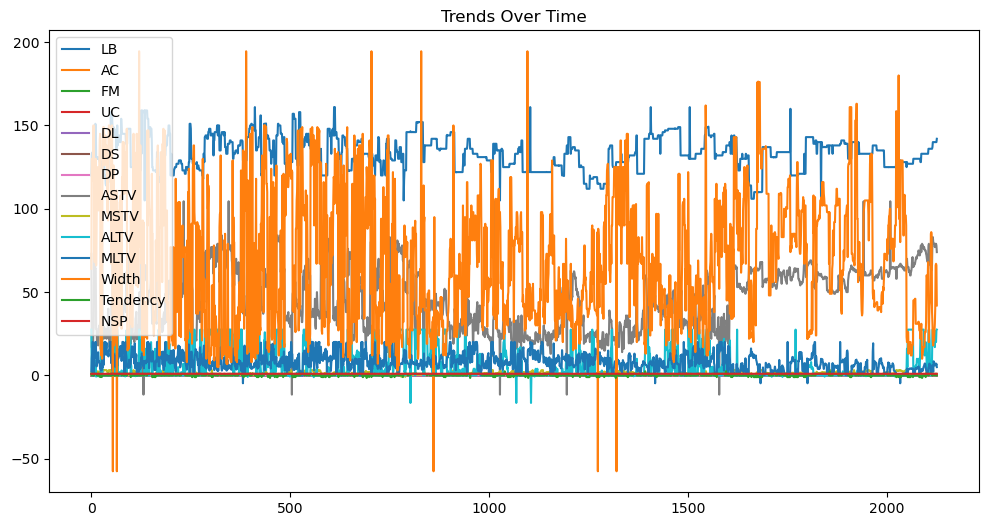

In [52]:
#Look for trends or patterns over time if temporal data is available.
plt.figure(figsize=(12, 6))
for col in df.columns:
    plt.plot(df.index, df[col], label=col)
plt.legend()
plt.title("Trends Over Time")
plt.show()


# Conclusion

In [55]:
# Missing Values & Data Cleaning:
# Several features had missing values, mainly in LB, AC, DS, DP, MLTV, Width, Tendency, and NSP.
# We used imputation for continuous variables.

# Statistical Summary & Distribution Analysis:
# Mean & Median Comparisons revealed skewness in variables.
# High standard deviations in AC, FM, and DP indicate wide variability in the dataset.

# Outlier Detection & Treatment:
# Outliers were detected using IQR (Interquartile Range) method, especially in FM, AC, DP, and DL (Decelerations Late).
# Capping of extreme values was performed to prevent the influence of outliers.

# Correlation & Relationships Between Variables:
# Strong positive correlation between FM (Fetal Movement) & AC (Accelerations)
# LB (Baseline FHR) & DP (Decelerations Prolonged) showed negative correlation.
# Heatmap analysis revealed MSTV (Short-Term Variability) and ASTV (Abnormal Short-Term Variability) were strongly correlated.

# Visualization & Patterns Identified:
# Histograms confirmed skewed distributions, particularly for AC, FM, and DP.
# Heatmaps helped identify strong associations between fetal monitoring parameters.

